# Anime Planet
### by Abdallah Mustafa

### objectives:
##### 1- to show the best animes based on years.
##### 2- to know which genres that always comes with each other.
##### 3- to know the animes with most episodes.
##### 4- to decide what to recommend for those love watching anime.


In [1]:
import numpy as np
import pandas as pd
import  seaborn as sns
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import sqlite3

# Data Cleaning

In [2]:
df= pd.read_csv('DataModified.csv')

## turn str to list

In [120]:
def StrToList(x):
    try:
        return eval(x)
    except:
        return x
df.tag = df['tag'].apply(StrToList)

## create a dictonary of all tags

In [10]:
 
tags = []
try:
    for tag in df.tag:
        for i in tag:
            if i not in tags:
                tags.append(i)
except:
    pass
zeros=list(map(int,np.zeros(len(tags))))
dic = dict(zip(tags,zeros))


## get the main genre

In [11]:

r =requests.get('https://www.anime-planet.com/anime/all')
s = BeautifulSoup(r.text, 'html.parser')

MG =[]
for g in s.find('div', {'id':'multipletags'}).ul.find_all('li', attrs={'data-class': 'filter-tooltip'}):
    MG.append(g.find('a').get_text())
MG

['Action',
 'Adventure',
 'BL',
 'Comedy',
 'Drama',
 'Ecchi',
 'Fantasy',
 'GL',
 'Harem',
 'Horror',
 'Josei',
 'Magical Girl',
 'Mecha',
 'Mystery',
 'Reverse Harem',
 'Romance',
 'Sci Fi',
 'Seinen',
 'Shoujo',
 'Shoujo-ai',
 'Shounen',
 'Shounen-ai',
 'Slice of Life',
 'Sports',
 'Yaoi',
 'Yuri']

## Assign true to the anime that have tags in this column


In [6]:

d1 = pd.DataFrame(columns=MG)
for name, i  in zip(df.Name,df.tag):
    if isinstance(i, list):
    
        dic = dict(zip(MG,zeros))
        dic['Name'] = name
        for genre in i:
            if genre in dic.keys():
                dic[genre] = 1
        
        d1 = d1.append(pd.DataFrame(pd.Series(dic)).transpose())
    elif isinstance(i, float):
        dic = dict(zip(MG,zeros))
        dic['Name'] = name
        d1 = d1.append(pd.DataFrame(pd.Series(dic)).transpose())

## show the data after ended

In [7]:
d1

,Action,Adventure,BL,Comedy,Drama,Ecchi,Fantasy,GL,Harem,Horror,...,Seinen,Shoujo,Shoujo-ai,Shounen,Shounen-ai,Slice of Life,Sports,Yaoi,Yuri,Name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,00:08
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,009-1
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,009-1: R&B
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,009 Re:Cyborg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Zutomayo: Seigi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Zutomayo: Tadashiku Narenai
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Zutomayo: Teiketsu Bolt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Z/X: Code Reunion


## get the name in first  column

In [50]:
columns=list(d1.columns)
columns
d1 = d1[columns[::-1]]

NameError: name 'd1' is not defined

## get the result into csv file

In [9]:

d1.to_csv('BGenre.csv', index=False)


## fill the missing data in columns

In [3]:
# fill the missing datain src
df.Src.loc[df.Src.isnull()] = "Other"


/home/mohazab/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
# fill the missing data in rating
df.Rating.fillna(0, inplace=True)     
# fill the missing data production year
df.sort_values(by='ProdYear', inplace=True)

listOfIndex=df[df.ProdYear.isnull()].index.to_list()
df.ProdYear.fillna(method='ffill', inplace=True)  

In [5]:
df.isna().sum()

Name               0
TotalEpisodes      0
Rating             0
ProdYear           0
AnimeType          0
DataID             0
DataType           0
HtmlREF            0
tag              395
description        8
Src                0
dtype: int64

In [8]:
df['ProdYear']=df['ProdYear'].apply(lambda x: float(x))

# data analysis and visualization

## what is the animes with the highest rates?

In [15]:
df.sort_values(by='Rating', ascending=False).head()

,Name,TotalEpisodes,Rating,ProdYear,AnimeType,DataID,DataType,HtmlREF,tag,description,Src
4505,Fruits Basket the Final Season,13,4.6,2021,TV,15791,anime,/anime/fruits-basket-the-final-season,"[Drama, Fantasy, Romance, Shoujo, Animal Trans...",The final arc of Fruits Basket.,Other
1103,Attack on Titan 3rd Season: Part II,10,4.6,2019,TV,11965,anime,/anime/attack-on-titan-3rd-season-part-ii,"[Action, Fantasy, Horror, Shounen, Dark Fantas...",The battle to retake Wall Maria begins now! Wi...,Funimation
1118,Attack on Titan The Final Season,16,4.6,2020,TV,13739,anime,/anime/attack-on-titan-the-final-season,"[Action, Drama, Fantasy, Horror, Shounen, Dark...",It's been four years since the Scout Regiment ...,Funimation
4532,Fullmetal Alchemist: Brotherhood,64,4.6,2009,TV,2360,anime,/anime/fullmetal-alchemist-brotherhood,"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...,Other
7260,Jujutsu Kaisen,24,4.6,2020,TV,14229,anime,/anime/jujutsu-kaisen,"[Action, Horror, Shounen, Curse, Monsters, Sch...",Although Yuji Itadori looks like your average ...,Viz


## which year anime starts being published?

In [7]:
df.ProdYear=df.ProdYear.apply(lambda x: str(x).split('-')[0]) # removing the question mark
df['ProdYear'].apply(lambda x:float(x)).min()


1907.0

## How  many anime types in the data?

<AxesSubplot:xlabel='AnimeType', ylabel='Count'>

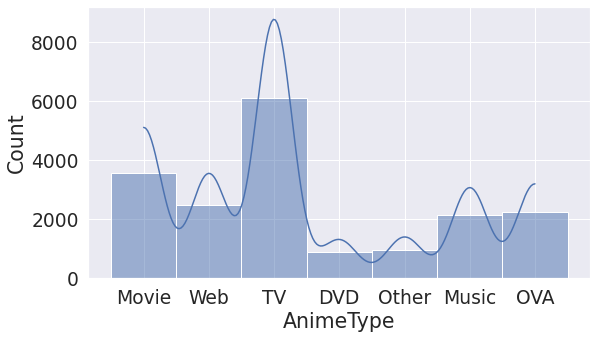

In [180]:
sns.set(rc={'figure.figsize': [9,5]}, font_scale=1.7)
sns.histplot(data=df, x="AnimeType", kde=True)


## which source has more Anime in the data?

In [184]:
pd.DataFrame(df['Src'].value_counts()).head(10)

,Src
ANN,1791
Crunchyroll,749
Funimation,338
Sentai Filmworks,168
Wikipedia,108
Official Site,102
Tokyo University of the Arts,99
Netflix,94
HIDIVE,77
MU,72


## what are the animes with the most episodes?

In [77]:
df.sort_values(by=['TotalEpisodes','Rating'], ascending=[0,1]).head()

,Name,TotalEpisodes,Rating,ProdYear,AnimeType,DataID,DataType,HtmlREF,tag,description,Src
13648,Sazae-san,2633,3.2,1969,TV,4098,anime,/anime/sazae-san,"['Comedy', 'Slice of Life', 'Family Life', 'Ba...","Sazae Fuguta, married to Masuo and mother of T...",ANN
11142,Nintama Rantarou,2204,3.6,1993,TV,7404,anime,/anime/nintama-rantarou,"['Action', 'Adventure', 'Comedy', 'Shounen', '...","Rantarou, Shinbei and Kirimaru are ninja appre...",ANN
11870,Oyako Club,1818,3.2,1994,TV,9652,anime,/anime/oyako-club,"['Comedy', 'Short Episodes']",This entry currently doesn't have a synopsis. ...,NaN
3536,Doraemon (1979),1787,3.5,1979,TV,742,anime,/anime/doraemon-1979,"['Comedy', 'Shounen', 'Cats', 'Family Friendly...","Nobita is dumb, lazy, and slow, and as a resul...",NaN
11427,Ojarumaru,1738,3.4,1998,TV,12039,anime,/anime/ojarumaru,"['Family Friendly', 'Short Episodes', 'Time Tr...","In the Heian era, around 1000 years ago, a you...",ANN


## which year that has animes with highest rates?

In [176]:
pd.DataFrame(df.groupby('ProdYear')["Rating"].mean()).sort_values(by='Rating', ascending=False).head(10)

,Rating
ProdYear,
2022.0,3.700000
1955.0,3.600000
2021.0,3.580763
2020.0,3.503251
2019.0,3.463534
1918.0,3.450000
2008.0,3.444041
2018.0,3.426777
2007.0,3.420053


<!-- what is the rel -->

<AxesSubplot:xlabel='ProdYear', ylabel='Density'>

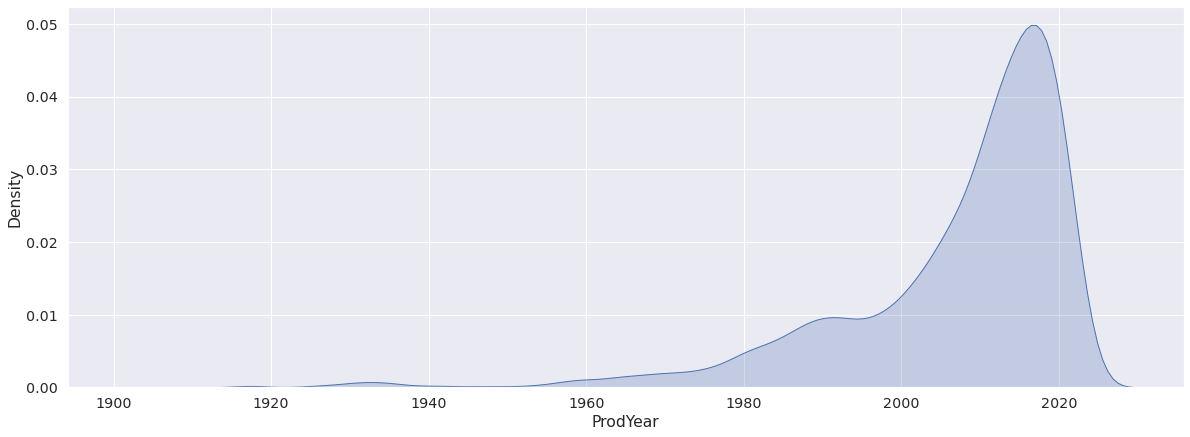

In [18]:
sns.set(rc={'figure.figsize': [20, 7]}, font_scale=1.3)
sns.kdeplot(data=df, x="ProdYear", shade=True)

## what is the relationship between number of episodes and rating?

In [79]:
df.corr()

,TotalEpisodes,Rating,DataID
TotalEpisodes,1.000000,0.057421,-0.035050
Rating,0.057421,1.000000,-0.017032
DataID,-0.035050,-0.017032,1.000000


<AxesSubplot:xlabel='Rating', ylabel='TotalEpisodes'>

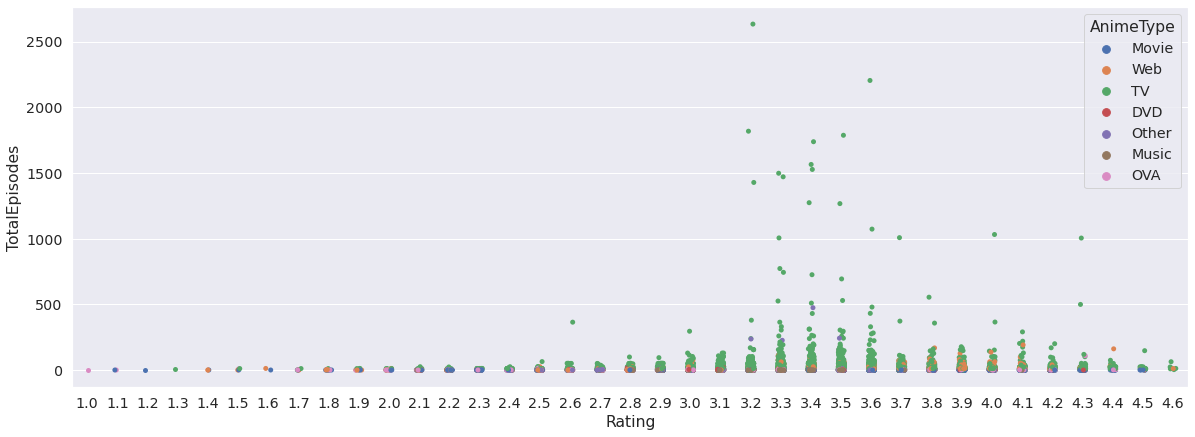

In [80]:

sns.set(rc={'figure.figsize': [20, 7]}, font_scale=1.3)
sns.stripplot(data=df, x='Rating', y='TotalEpisodes', hue='AnimeType')

## Relationship between rating and year 

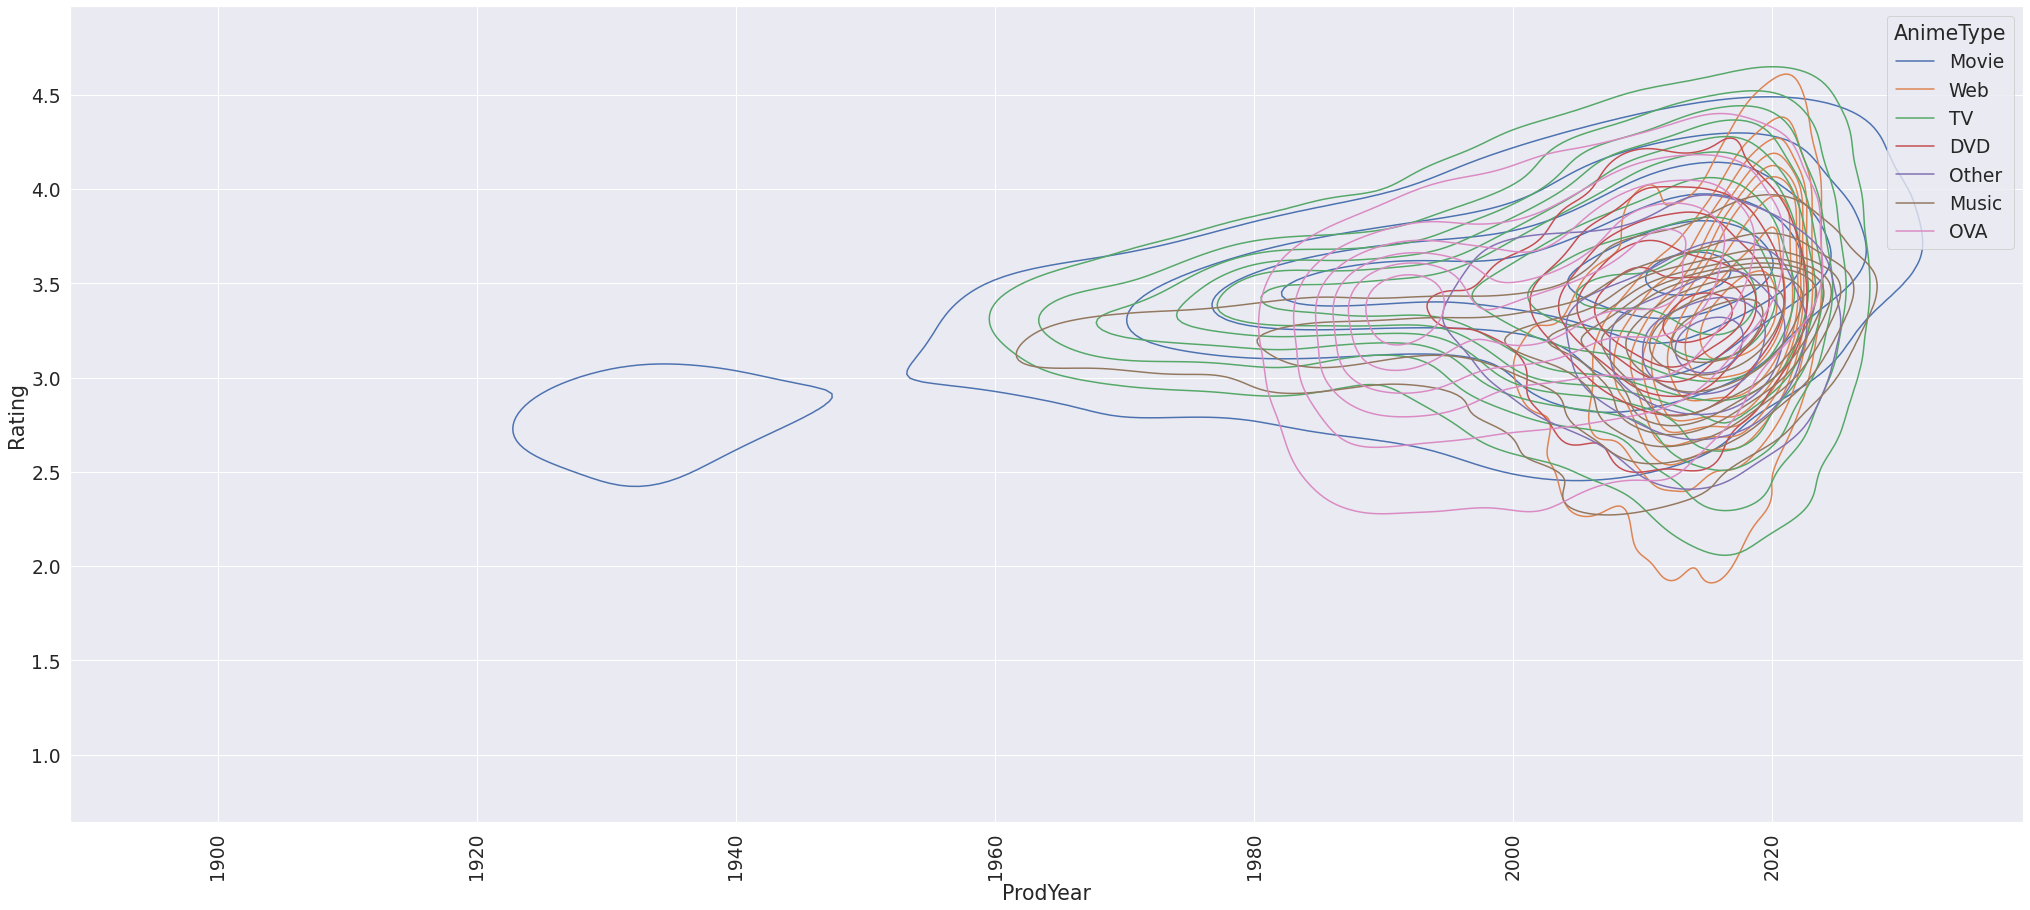

In [146]:
sns.set(rc={'figure.figsize': [35,15]}, font_scale=1.7)
plot=sns.kdeplot(data=df, x='ProdYear', y='Rating', hue='AnimeType') 
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()
# this grapgh decribes not only the anime with highest rates but also whether this year has 
# bubble or outliers in rating or not

## if you want to know specific anime based on name

In [82]:
df.loc[df.Name.str.contains("bleach", case=False)].sort_values(by='Rating',ascending=False)


,Name,TotalEpisodes,Rating,ProdYear,AnimeType,DataID,DataType,HtmlREF,tag,description,Src
1678,Bleach,366,4.0,2004,TV,780,anime,/anime/bleach,"['Action', 'Shounen', 'Afterlife', 'Shinigami'...",Fifteen-year-old Ichigo Kurosaki is a typical ...,NaN
1685,Bleach Movie 4: Hell Verse,1,4.0,2010,Movie,3783,anime,/anime/bleach-movie-4-hell-verse,"['Action', 'Shounen', 'Shinigami', 'Supernatur...",Hell – A place where beings that have committe...,Viz
1683,Bleach Movie 2: The DiamondDust Rebellion,1,3.9,2007,Movie,2085,anime,/anime/bleach-movie-2-the-diamonddust-rebellion,"['Action', 'Shounen', 'Shinigami', 'Supernatur...",Hitsugaya and his Division are charged with gu...,NaN
1684,Bleach Movie 3: Fade to Black,1,3.9,2008,Movie,2634,anime,/anime/bleach-movie-3-fade-to-black,"['Action', 'Shounen', 'Shinigami', 'Supernatur...","One night, two mysterious figures infiltrate t...",NaN
1682,Bleach Movie 1: Memories of Nobody,1,3.8,2006,Movie,1424,anime,/anime/bleach-movie-1-memories-of-nobody,"['Action', 'Shounen', 'Shinigami', 'Supernatur...","Back in the real world, Ichigo and the gang ha...",NaN
1681,Bleach: Memories in the Rain,1,3.7,2004,OVA,1545,anime,/anime/bleach-memories-in-the-rain,"['Action', 'Shounen', 'Shinigami', 'Supernatur...","On the anniversary of his mother's death, Kuro...",NaN
1687,Bleach: The Sealed Sword Frenzy,1,3.6,2005,OVA,1198,anime,/anime/bleach-the-sealed-sword-frenzy,"['Action', 'Shounen', 'Shinigami', 'Supernatur...",Baishin -- a shinigami that was sealed by Soul...,NaN
1679,Bleach: Gotei 13 Omake,1,3.4,2005,Other,13341,anime,/anime/bleach-gotei-13-omake,"['Comedy', 'Supernatural', 'Based on a Manga']",This entry currently doesn't have a synopsis. ...,NaN
1680,Bleach: Jump Festa 2008 Special,1,3.3,2008,Other,13339,anime,/anime/bleach-jump-festa-2008-special,"['Comedy', 'Supernatural', 'Based on a Manga']",This entry currently doesn't have a synopsis. ...,NaN
1686,Bleach: Sennen Kessen-hen,0,NaN,2022,TV,14662,anime,/anime/bleach-sennen-kessen-hen,"['Action', 'Comedy', 'Drama', 'Shounen', 'Afte...",The peace is suddenly broken when warning sire...,Viz


## Relation between anime type and average rating

<AxesSubplot:xlabel='AnimeType', ylabel='Rating'>

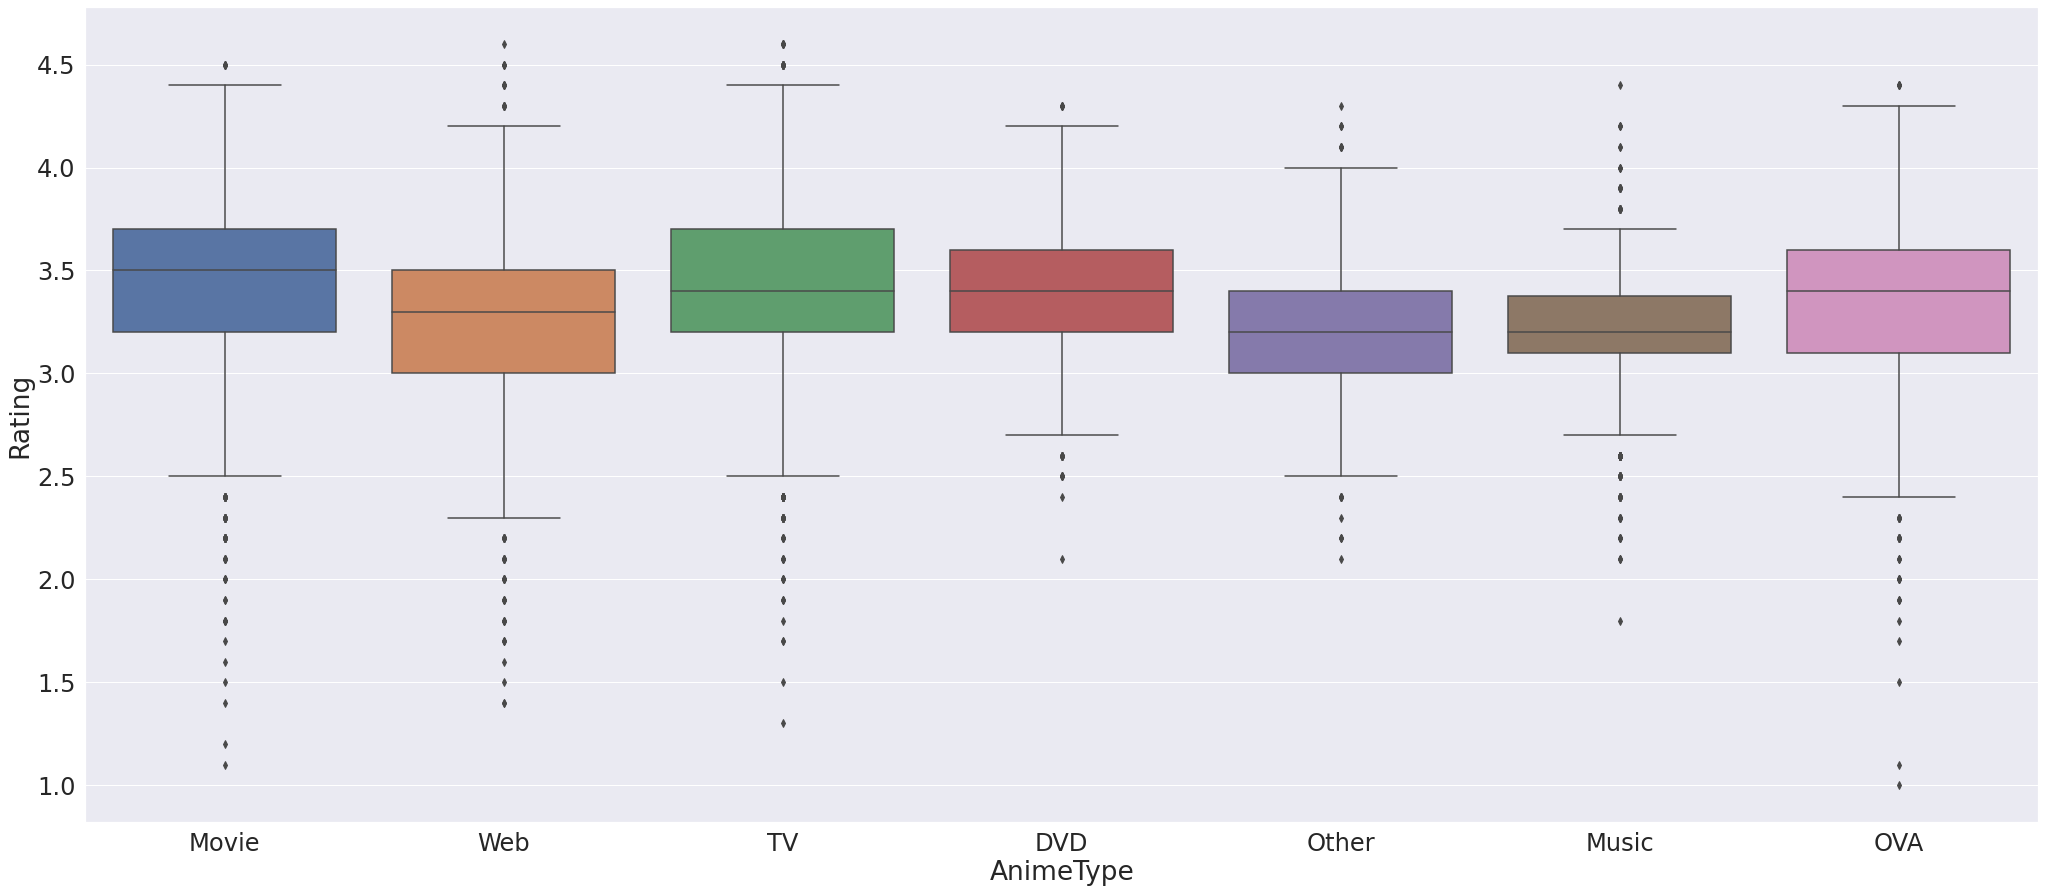

In [135]:
sns.set(rc={'figure.figsize': [35,15]}, font_scale=2.2)
sns.boxplot(data=df, x='AnimeType',y="Rating")

## what are the 10 best rating resources?

In [182]:
src = pd.DataFrame(df.groupby('Src')["Rating"].mean()).sort_values(by='Rating', ascending=False).head(15)
src = src.reset_index()
src

,Src,Rating
0,ELEVEN ARTS,4.50
1,ACJ,4.40
2,One Peace Books,4.40
3,WSJ,4.30
4,A Fragment of Fantasy,4.30
5,Banquet of Play,4.30
6,Siren Visual,4.30
7,Azoland Pictures,4.20
8,Tencent,4.20
9,Cinedigm,4.10


## what are the types that mostly comes with each other??

In [121]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dict
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['tag']:
    if isinstance(row, list):
        count.update(Counter(combinations(row, 4)))
    else:
        continue
for key,value in count.most_common(15):
    print(key, value)

('Animal Protagonists', 'Anthropomorphic', 'Family Friendly', 'Non-Human Protagonists') 345
('Comedy', 'Shounen', 'School Life', 'Based on a Manga') 208
('Animal Protagonists', 'Family Friendly', 'Non-Human Protagonists', 'Short Episodes') 201
('Comedy', 'Seinen', 'Slice of Life', 'Based on a Manga') 197
('Adventure', 'Animal Protagonists', 'Family Friendly', 'Non-Human Protagonists') 196
('Action', 'Mecha', 'Sci Fi', 'Original Work') 193
('Comedy', 'Animal Protagonists', 'Non-Human Protagonists', 'Short Episodes') 189
('Action', 'Comedy', 'Shounen', 'Based on a Manga') 178
('Comedy', 'Animal Protagonists', 'Anthropomorphic', 'Non-Human Protagonists') 170
('Action', 'Fantasy', 'Shounen', 'Based on a Manga') 164
('Fantasy', 'Magical Girl', 'Henshin Heroes', 'Magic') 160
('Action', 'Adventure', 'Shounen', 'Based on a Manga') 160
('Animal Protagonists', 'Anthropomorphic', 'Chinese Animation', 'Non-Human Protagonists') 156
('Action', 'Shounen', 'Superpowers', 'Based on a Manga') 154
('Anim

## joining the the Genre and the data with each other

In [185]:
connection = sqlite3.connect('anime.db')
dfQuary = pd.read_sql('''SELECT a.*, b.*
FROM DataModified a, BGenre b
WHERE a.Name = b.Name''', connection)
connection.close()
dfQuary

,Name,TotalEpisodes,Rating,ProdYear,AnimeType,DataID,DataType,HtmlREF,tag,description,...,Horror,Harem,GL,Fantasy,Ecchi,Drama,Comedy,BL,Adventure,Action
0,00:08,1,2.3,2014,Movie,10050,anime,/anime/00-08,"['Abstract', 'No Dialogue', 'Shorts']","This piece takes 8 seconds, and creates interv...",...,0,0,0,0,0,0,0,0,0,0
1,001,1,1.8,2013,Web,10252,anime,/anime/001,"['Black and White', 'Shorts']",A man's face is repeatedly wiped away by a win...,...,0,0,0,0,0,0,0,0,0,0
2,009-1,12,2.9,2006,TV,1177,anime,/anime/009-1,"['Action', 'Ecchi', 'Sci Fi', 'Seinen', 'Cybor...","In an alternate version of Earth, the Cold War...",...,0,0,0,0,1,0,0,0,0,1
3,009-1: R&B,1,3.1,2007,DVD,3055,anime,/anime/009-1-rb,"['Action', 'Ecchi', 'Sci Fi', 'Seinen', 'Cybor...",This entry currently doesn't have a synopsis. ...,...,0,0,0,0,1,0,0,0,0,1
4,009 Re:Cyborg,1,3.2,2012,Movie,4578,anime,/anime/009-re-cyborg,"['Action', 'Sci Fi', 'Shounen', 'Cyborgs', 'Su...","Many years ago, nine humans were captured and ...",...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18390,Zutomayo: Seigi,1,3.3,2019,Music,15687,anime,/anime/zutomayo-seigi,None,The official music video for Seigi from the al...,...,0,0,0,0,0,0,0,0,0,0
18391,Zutomayo: Tadashiku Narenai,1,3.3,2020,Music,16117,anime,/anime/zutomayo-tadashiku-narenai,['CG Animation'],The official music video for Tadashiku Narenai...,...,0,0,0,0,0,0,0,0,0,0
18392,Zutomayo: Teiketsu Bolt,1,3.3,2020,Music,15681,anime,/anime/zutomayo-teiketsu-bolt,"['Action', 'Fantasy']",This entry currently doesn't have a synopsis. ...,...,0,0,0,1,0,0,0,0,0,1
18393,Z/X: Code Reunion,12,2.9,2019,TV,9175,anime,/anime/zx-code-reunion,"['Action', 'Fantasy', 'Sci Fi', 'Based on a Ma...",The signing of a peace treaty has secured a te...,...,0,0,0,1,0,0,0,0,0,1


In [186]:
dfQuary = dfQuary.loc[:,~dfQuary.columns.duplicated()]
dfQuary.columns

Index(['Name', 'TotalEpisodes', 'Rating', 'ProdYear', 'AnimeType', 'DataID',
       'DataType', 'HtmlREF', 'tag', 'description', 'Src', 'Yuri', 'Yaoi',
       'Sports', 'SliceofLife', 'Shounen-ai', 'Shounen', 'Shoujo-ai', 'Shoujo',
       'Seinen', 'SciFi', 'Romance', 'ReverseHarem', 'Mystery', 'Mecha',
       'MagicalGirl', 'Josei', 'Horror', 'Harem', 'GL', 'Fantasy', 'Ecchi',
       'Drama', 'Comedy', 'BL', 'Adventure', 'Action'],
      dtype='object')

## Rating and its relations with genres

In [191]:
hm=dfQuary.loc[dfQuary["Rating"] > 3].groupby(by="Rating").sum().transpose().iloc[2:]
hm

Rating,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6
Yuri,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Yaoi,3,6,4,2,1,5,1,0,4,1,1,0,1,0,0,0
Sports,31,26,47,71,93,60,31,32,23,21,34,22,11,9,4,0
SliceofLife,72,101,121,138,130,114,75,82,70,49,25,15,10,6,0,0
Shounen-ai,6,5,6,7,9,1,5,4,6,8,7,5,3,2,3,0
Shounen,79,108,147,194,219,202,178,184,146,108,84,66,44,31,12,5
Shoujo-ai,1,8,8,10,8,9,3,5,2,4,0,0,0,0,0,0
Shoujo,21,23,39,35,46,42,41,37,12,19,12,10,13,9,1,1
Seinen,52,56,81,92,104,114,78,96,64,47,41,30,14,10,0,0
SciFi,139,214,281,291,289,228,147,115,83,50,56,37,19,17,3,0


<AxesSubplot:xlabel='Rating'>

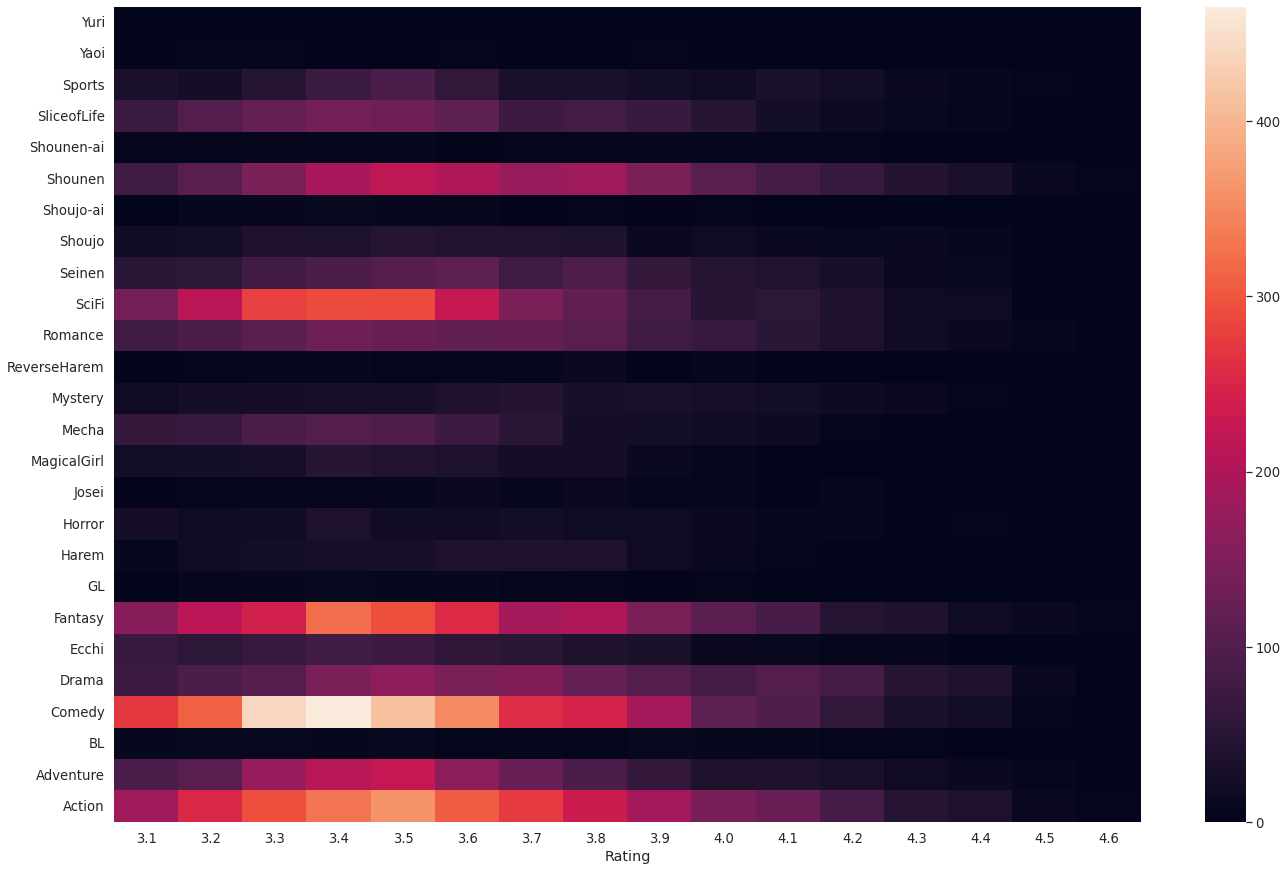

In [193]:
sns.set(rc={'figure.figsize': [23,15]}, font_scale=1.2)
sns.heatmap(hm)

## Data training module

In [29]:
x =dfQuary.drop('Rating', axis=1)
y=dfQuary['Rating']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=66)
x_train

,Name,TotalEpisodes,ProdYear,AnimeType,DataID,DataType,HtmlREF,tag,description,Src,...,Horror,Harem,GL,Fantasy,Ecchi,Drama,Comedy,BL,Adventure,Action
16642,Tsuyoshi Shikkari Shinasai: Tsuyoshi no Time M...,1,1993,Movie,12328,anime,/anime/tsuyoshi-shikkari-shinasai-tsuyoshi-no-...,"['Comedy', 'Seinen', 'Based on a Manga']",This entry currently doesn't have a synopsis. ...,None,...,0,0,0,0,0,0,1,0,0,0
3399,Digimon Xros Wars: Aku no Death General to Shi...,24,2011,TV,4275,anime,/anime/digimon-xros-wars-aku-no-death-general-...,"['Action', 'Adventure', 'Sci Fi', 'Shounen', '...",Second season of Digimon Xros Wars.,None,...,0,0,0,0,0,0,0,0,1,1
4799,Gargoyle of the Yoshinagas Special,5,2006,DVD,3255,anime,/anime/gargoyle-of-the-yoshinagas-special,None,This entry currently doesn't have a synopsis. ...,None,...,0,0,0,0,0,0,0,0,0,0
2342,Chidori RSC,12,2019,TV,11969,anime,/anime/chidori-rsc,"['Comedy', 'Seinen', 'Sports', 'Guns', 'School...",Hikari Kokura has a passion for competitive sh...,Sentai Filmworks,...,0,0,0,0,0,0,1,0,0,0
9061,Luotuo Xian Wu,1,1935,Movie,17251,anime,/anime/luotuo-xian-wu,"['Fantasy', 'Chinese Animation', 'Based on a F...",This entry currently doesn't have a synopsis. ...,None,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9165,Macross Frontier,25,2007,TV,1875,anime,/anime/macross-frontier,"['Action', 'Mecha', 'Romance', 'Sci Fi', 'Alie...",After being threatened by extinction at the ha...,None,...,0,0,0,0,0,0,0,0,0,1
5199,Golden Douga Gekijou Specials,4,2018,DVD,18369,anime,/anime/golden-douga-gekijou-specials,['Comedy'],Unaired episodes included in the BD/DVD volume...,None,...,0,0,0,0,0,0,1,0,0,0
18125,Yuuki Yuuna wa Yuusha de Aru Churutto!,12,2021,TV,16587,anime,/anime/yuuki-yuuna-wa-yuusha-de-aru-churutto,"['Comedy', 'Chibi', 'Short Episodes']",This entry currently doesn't have a synopsis. ...,None,...,0,0,0,0,0,0,1,0,0,0
8243,Konpeki no Kantai Tokubetsu-hen: Sourai Kaihat...,1,1997,OVA,15697,anime,/anime/konpeki-no-kantai-tokubetsu-hen-sourai-...,"['Historical', 'Military', 'War', 'World War 2...",This entry currently doesn't have a synopsis. ...,None,...,0,0,0,0,0,0,0,0,0,0
